# EDA of final final and comparison with old file

## 1. Preliminaries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import numpy as np
from comparison_of_final_files.compare_two_final_csvs import FinalCrbaFileComparator
#from comparison_of_final_files import FinalCrbaFileComparator

In [2]:
# Instantiate class

crba_final_2020 = pd.read_csv("D:\\Documents\\2020\\28_UNICEF\\10_working_repo\\data-etl\\data_out\\crba_final_sdmx_ready.csv", ";") 
crba_final_2023 = pd.read_csv("D:\\Documents\\2023\\7_UNICEF\\major-dax-crba-etl\\crba-etl\\config\\2023\\out\\data\\crba_final_sdmx_ready.csv", ";")

my_comparer = FinalCrbaFileComparator(
    crba_final_2020,
    crba_final_2023
)

# NB: df_2 is crba_final_2023

C:\Users\info\AppData\Local\Temp\ipykernel_3400\3482916499.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  crba_final_2020 = pd.read_csv("D:\\Documents\\2020\\28_UNICEF\\10_working_repo\\data-etl\\data_out\\crba_final_sdmx_ready.csv", ";")
C:\Users\info\AppData\Local\Temp\ipykernel_3400\3482916499.py:3: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  crba_final_2020 = pd.read_csv("D:\\Documents\\2020\\28_UNICEF\\10_working_repo\\data-etl\\data_out\\crba_final_sdmx_ready.csv", ";")
C:\Users\info\AppData\Local\Temp\ipykernel_3400\3482916499.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  crba_final_2023 = pd.read_csv("D:\\Documents\\2023\\7_UNICEF\\major-dax-crba-etl\\crba-etl\\config\\2023\\out\\data\\crba_final_sdmx_ready.csv", ";")
C:\

# 2. EDA on final file

1. Number of NAN countries per indicator
2. Number of NA observations per country
3. Number of indicators per category
4. Top and bottom 5 countries overall and per INDEX

## 2.1 Numer of NAN countries per indicator

In [4]:
# Number of NAN countries per indicator
my_comparer.get_number_of_NA_per_column_value(
    my_comparer.df_2,
    column_for_per_category="INDICATOR_CODE"
)

INDICATOR_CODE
WP_DW_LF_FOWECO      0
WP_DW_LF_LAINCO      0
WP_DW_LF_HOWOCO      0
WP_DW_LF_FRASCO      0
WP_CL_LF_PRFOLC      0
                  ... 
MP_MA_LF_REMACH    160
CE_RD_EN_REGOEM    160
MP_PS_OC_ELWARE    164
WP_DW_EN_COBACO    176
WP_DW_EN_TRUNRE    186
Length: 198, dtype: int64

## 2.2 Numer of NA observations per country

In [5]:
# Number of NAN countries per indicator
my_comparer.get_number_of_NA_per_column_value(
    my_comparer.df_2,
    column_for_per_category="COUNTRY_ISO_3"
)

COUNTRY_ISO_3
GHA      5
GTM     10
MEX     10
COL     10
IDN     10
      ... 
PLW     76
PSE     76
LIE     86
MCO     87
XKX    139
Length: 195, dtype: int64

## 2.3 Numberer of indicators per category

In [3]:
my_comparer.get_number_of_indicators_per_column(
    df = my_comparer.df_1
)


 
 This is the number of indicators per INDICATOR_INDEX
INDICATOR_INDEX
WP    78
CE    72
MP    56
dtype: int64

 
 This is the number of indicators per INDICATOR_CATEGORY
INDICATOR_CATEGORY
LEG_FRAMEWORK_NAT         62
OUTCOME                   52
ENFORCEMENT               49
LEG_FRAMEWORK_INTERNAT    43
dtype: int64

 
 This is the number of indicators per INDICATOR_ISSUE
INDICATOR_ISSUE
DECENT_WORK_COND        33
MARKETING_ADV           25
CHLD_LABOUR             24
RESOURCE_ENV_DAMAGE     22
MAT_PAT_PROT            21
ONLINE_ABUSE_EXPL       19
SECURITY_ARRANGMENTS    17
CH_RIGHTS_FULLF         13
PROD_SAFETY             12
NAT_DISASTERS           11
LAND_RIGHTS              9
dtype: int64

 
 Lastly, this is the numer of indicators per all three of those categories
INDICATOR_INDEX  INDICATOR_CATEGORY      INDICATOR_ISSUE     
MP               LEG_FRAMEWORK_NAT       MARKETING_ADV           13
WP               LEG_FRAMEWORK_INTERNAT  DECENT_WORK_COND        11
                 LEG

In [4]:
my_comparer.get_number_of_indicators_per_column(
    df = my_comparer.df_2
)


 
 This is the number of indicators per INDICATOR_INDEX
INDICATOR_INDEX
WP    72
CE    71
MP    55
dtype: int64

 
 This is the number of indicators per INDICATOR_CATEGORY
INDICATOR_CATEGORY
LEG_FRAMEWORK_NAT         59
OUTCOME                   49
ENFORCEMENT               47
LEG_FRAMEWORK_INTERNAT    43
dtype: int64

 
 This is the number of indicators per INDICATOR_ISSUE
INDICATOR_ISSUE
DECENT_WORK_COND        32
MARKETING_ADV           25
CHLD_LABOUR             22
RESOURCE_ENV_DAMAGE     22
MAT_PAT_PROT            18
ONLINE_ABUSE_EXPL       18
SECURITY_ARRANGMENTS    16
CH_RIGHTS_FULLF         13
PROD_SAFETY             12
NAT_DISASTERS           11
LAND_RIGHTS              9
dtype: int64

 
 Lastly, this is the numer of indicators per all three of those categories
INDICATOR_INDEX  INDICATOR_CATEGORY      INDICATOR_ISSUE     
MP               LEG_FRAMEWORK_NAT       MARKETING_ADV           13
WP               LEG_FRAMEWORK_INTERNAT  DECENT_WORK_COND        11
CE               LEG

## 2.4 Top and bottom 5 countries overall

In [5]:
my_comparer.get_top_and_worst_countries_per_category("OVERALL")

Top 5 countries:     COUNTRY_ISO_3  TIME_PERIOD  CRBA_RELEASE_YEAR  RAW_OBS_VALUE  \
56            FIN  2020.011538             2023.0      30.985661   
12            BEL  2020.057613             2023.0      41.487782   
30            CHE  2020.134615             2023.0      47.600984   
129           NOR  2019.927126             2023.0      52.116391   
58            FRA  2020.108527             2023.0      43.748005   

     SCALED_OBS_VALUE  CATEGORY_ISSUE_SCORE  ISSUE_INDEX_SCORE  INDEX_SCORE  \
56           8.217262              8.189775           8.406951     8.342620   
12           8.012919              8.061965           8.328793     8.305012   
30           7.961515              7.956819           8.024923     8.196070   
129          8.180947              8.111537           8.191064     8.181387   
58           8.267439              8.055158           8.115071     8.144242   

     OVERALL_SCORE  RANK_OVERALL_SCORE  
56        8.353371                 1.0  
12        8.30902

d:\Documents\2023\7_UNICEF\major-dax-crba-etl\crba-etl\validation\comparison_of_final_files\compare_two_final_csvs.py:126: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = self.df_2.groupby("COUNTRY_ISO_3", as_index=False).mean()


In [6]:
my_comparer.get_top_and_worst_countries_per_category("INDEX")

Calculating top and bottom countrie for INDICATORINDEX ==  Workplace
Top 5 countries: Empty DataFrame
Columns: [COUNTRY_ISO_3, INDICATOR_INDEX, TIME_PERIOD, CRBA_RELEASE_YEAR, RAW_OBS_VALUE, SCALED_OBS_VALUE, CATEGORY_ISSUE_SCORE, ISSUE_INDEX_SCORE, INDEX_SCORE, OVERALL_SCORE, RANK_OVERALL_SCORE]
Index: []
Bottom 5 countries: Empty DataFrame
Columns: [COUNTRY_ISO_3, INDICATOR_INDEX, TIME_PERIOD, CRBA_RELEASE_YEAR, RAW_OBS_VALUE, SCALED_OBS_VALUE, CATEGORY_ISSUE_SCORE, ISSUE_INDEX_SCORE, INDEX_SCORE, OVERALL_SCORE, RANK_OVERALL_SCORE]
Index: []
Calculating top and bottom countrie for INDICATORINDEX ==  Community and Environment
Top 5 countries: Empty DataFrame
Columns: [COUNTRY_ISO_3, INDICATOR_INDEX, TIME_PERIOD, CRBA_RELEASE_YEAR, RAW_OBS_VALUE, SCALED_OBS_VALUE, CATEGORY_ISSUE_SCORE, ISSUE_INDEX_SCORE, INDEX_SCORE, OVERALL_SCORE, RANK_OVERALL_SCORE]
Index: []
Bottom 5 countries: Empty DataFrame
Columns: [COUNTRY_ISO_3, INDICATOR_INDEX, TIME_PERIOD, CRBA_RELEASE_YEAR, RAW_OBS_VALUE, S

d:\Documents\2023\7_UNICEF\major-dax-crba-etl\crba-etl\validation\comparison_of_final_files\compare_two_final_csvs.py:132: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = self.df_2.groupby(["COUNTRY_ISO_3", "INDICATOR_INDEX"], as_index=False).mean()


# 3. Comparison of files of 2023 and 2020

1. Comparison of existing olumns
2. Compare distributions of `TIME_PERIOD` 
3. Compare distribution of scores
    5.1 Overall score
    5.2 Score per INDEX
4. Which country has improved/ worsened most? 
5. For which observations has `TIME_PERIOD` become older?
6. Which indicators have been retired/ added between 2020 and 2023?
7. Percentage of observations for which we have new data
8. Distribution of rank change

(SKIPPED Run the same health checks (i.e. Indonesia > Canada) as before)

## 3.1 Comparison of existing column

In [7]:
my_comparer.compare_existing_columns()

Columns that are in df_1 which aren_t in df_2 {'DIM_MANAGEMENT_LEVEL'}
Columns that are in df_2 which aren_t in df_1 {'SOURCE_ID'}


## 3.2. Comparison of distributions of TIME_PERIOD

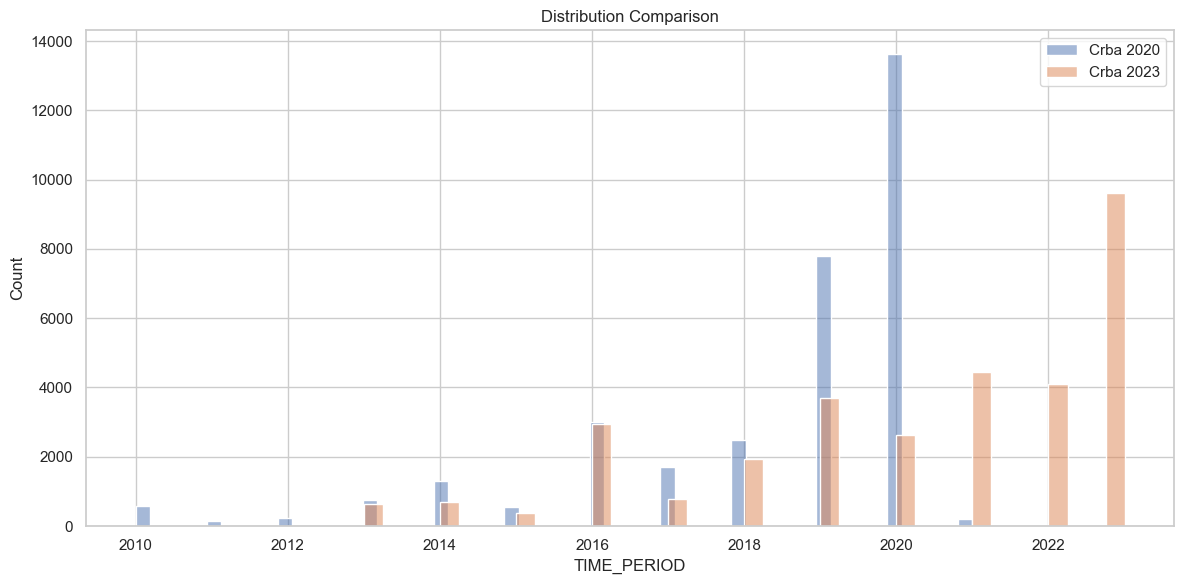

In [8]:
my_comparer.compare_column_distribution("TIME_PERIOD")

## 3.3 Comparison of distributions of scores
### 3.3.1 OVERALL SCORE

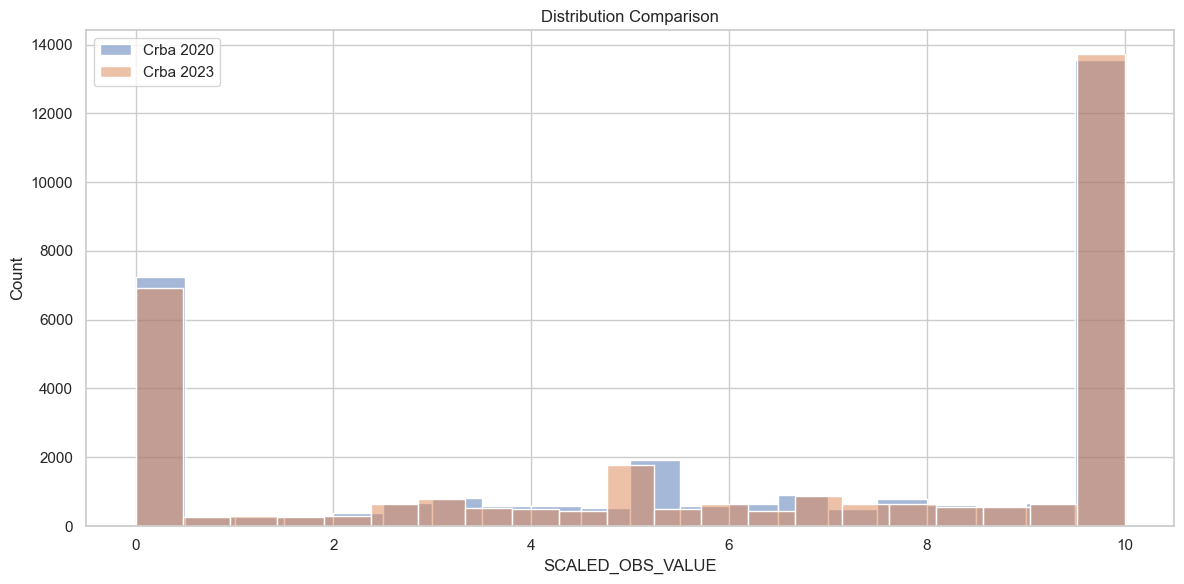

In [9]:
my_comparer.compare_column_distribution("SCALED_OBS_VALUE")

5.872051934586483
5.988306855071548


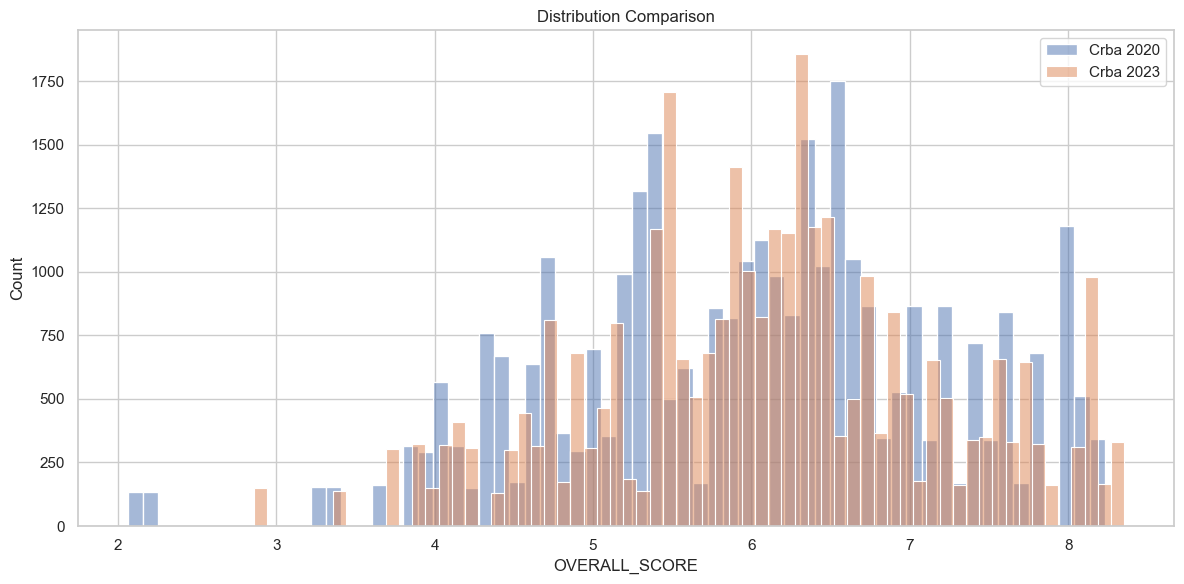

In [10]:
print(my_comparer.df_1["OVERALL_SCORE"].mean())
print(my_comparer.df_2["OVERALL_SCORE"].mean())
my_comparer.compare_column_distribution("OVERALL_SCORE")

## 3.3.2 Score per Index

['WP', 'Workplace']


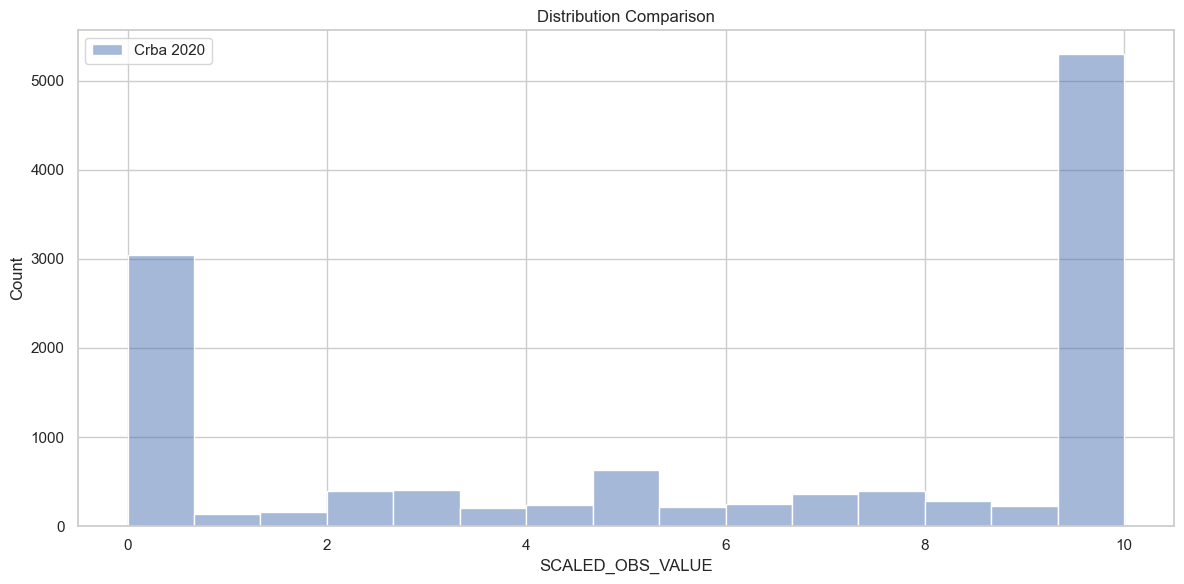

['CE', 'Community and Environment']


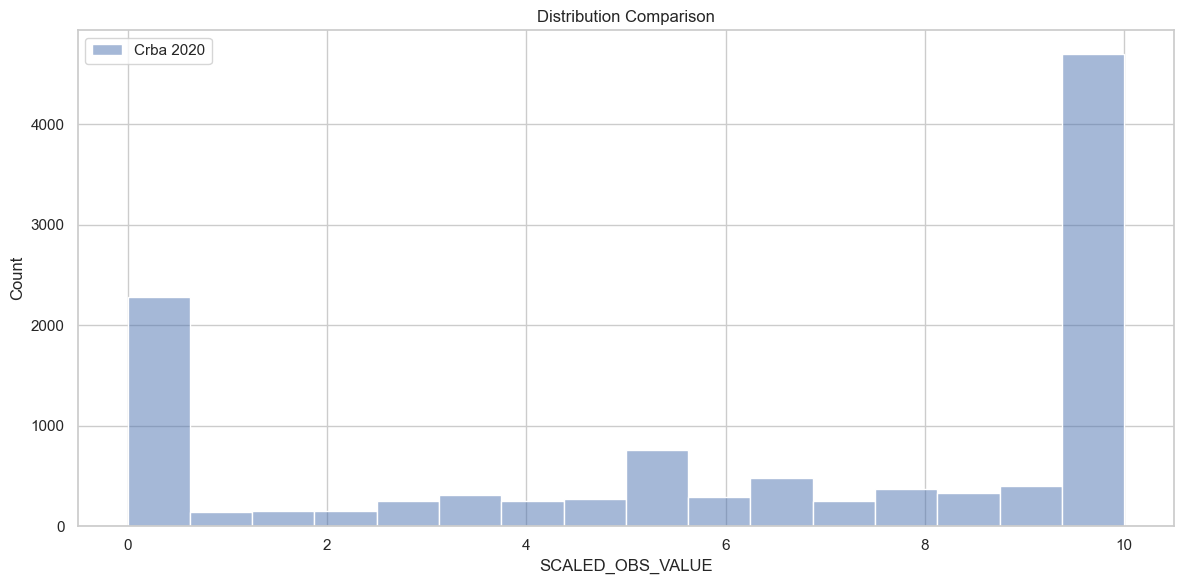

['MP', 'Marketplace']


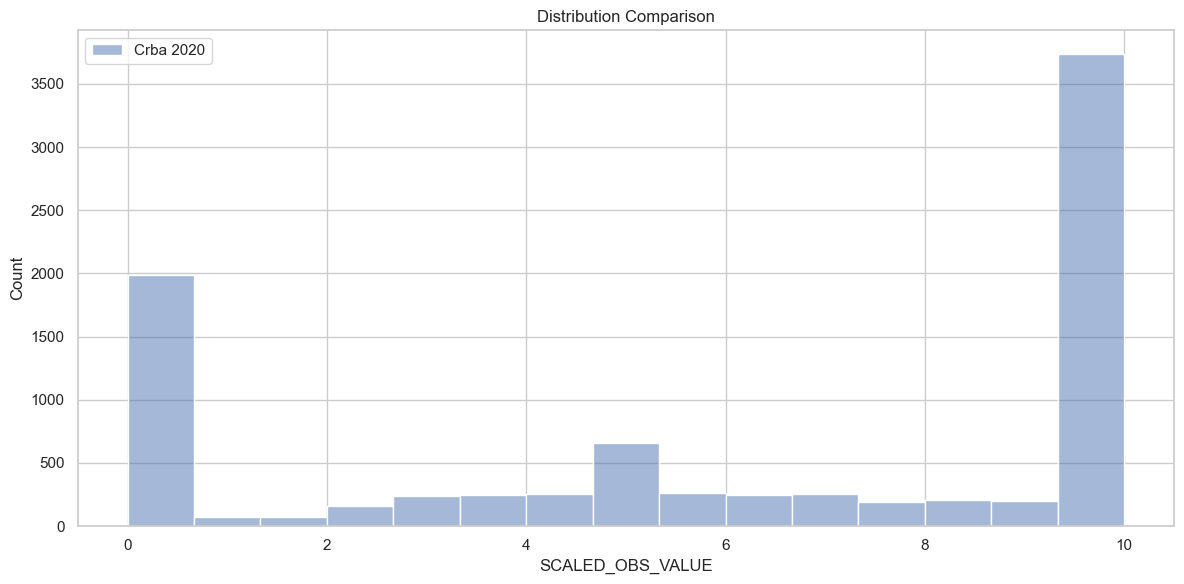

In [11]:
index_list=[
    "WP", 
    "CE", 
    "MP", 
]

for i in index_list:
    print(i)
    my_comparer.compare_column_distribution(
        column_name="SCALED_OBS_VALUE",
        filter_to_subset_df_1=my_comparer.df_1_filtered['INDICATOR_INDEX']==i,
        filter_to_subset_df_2=my_comparer.df_2_filtered['INDICATOR_INDEX']==i
    )

### 3.3.3 Per issue

In [ ]:
# issue_list=[
#     ["CHLD_LABOUR", "Child labour"],
#     ["ONLINE_ABUSE_EXPL", "Online Abuse and exploitation"],
#     ["MARKETING_ADV", "Marketing and Advertising"],
#     ["RESOURCE_ENV_DAMAGE", "Resource use and damage to the environment"],
#     ["LAND_RIGHTS", "Land rights"],
#     ["SECURITY_ARRANGMENTS", "Security arrangements"],
#     ["NAT_DISASTERS", "Natural disasters"],
#     ["CH_RIGHTS_FULLF", "Fulfillment of children’s rights"],
#     ["DECENT_WORK_COND", "Decent working conditions"],
#     ["MAT_PAT_PROT", "Maternity and paternity protection"],
# ]

# for i in index_list:
#     print(i)
#     my_comparer.compare_column_distribution(
#         column_name="SCALED_OBS_VALUE",
#         filter_to_subset_df_1=my_comparer.df_1_filtered['INDICATOR_ISSUE']==i[0],
#         filter_to_subset_df_2=my_comparer.df_2_filtered['INDICATOR_ISSUE']==i[1]
#     )

## 3.4 Which country has improved/ worsened most?

In [ ]:
my_comparer.compute_country_score_changes(target_col="OVERALL_SCORE")

## 3.5 For which observations has TIME_PERIOD become older?

In [ ]:
my_comparer.calculate_percentage_of_updated_observations()

## 3.6 Which indicators have been retired/ added between 2020 and 2023? 

In [ ]:
my_comparer.find_unique_values("INDICATOR_CODE")

In [ ]:
unique_2020 = ['CE_LR_LF_CORIIP',
 #'CE_ND_OC_NEDPND', # Will be gone when Lasse merged nltp stopwords
 #'CE_ND_OC_NPIDND', # Will be gone when Lasse merged nltp stopwords
 'CE_SA_LF_USCHHP',
 #'CE_SA_OC_NEDPCV', # Will be gone when Lasse merged nltp stopwords
 #'CE_SA_OC_NPIDCV', # Will be gone when Lasse merged nltp stopwords
 #'CE_SA_OC_REUSCH', # Will be gone when Lasse merged nltp stopwords
 #'MP_MA_EN_OPPOAU', # Will be gone when Lasse merged nltp stopwords
 #'MP_MA_EN_OPPOTU', # Will be gone when Lasse merged nltp stopwords
 'MP_OL_EN_CSAEGC',
 'MP_OL_OC_CHSAEE',
 'WP_CL_LF_CSAELF',
 'WP_CL_OC_PRHAWA',
 'WP_DW_LF_FREASS',
 'WP_MP_EN_MALECB',
 'WP_MP_OC_COMALE',
 'WP_MP_OC_MACABE']
unique_2023 = ['CE_ND_OC_NEDIND',
 'CE_ND_OC_NUIDND',
 'CE_SA_OC_NEDICV',
 'CE_SA_OC_NUIDCV',
 'CE_SA_OC_RECHHO',
 'MP_MA_EN_OPPOAL',
 'MP_MA_EN_OPPOTO']

In [ ]:
dif_2020 = [
    #'WP_MP_OC_MACABE', # Retired according to CRBA ticket
    #'MP_OL_OC_CHSAEE', # Retired according to CRBA ticket
    'CE_LR_LF_CORIIP', 
    #'WP_CL_OC_PRHAWA', # Retired according to CRBA ticket
    #'CE_SA_LF_USCHHP', # Retired according to CRBA ticket
    #'WP_CL_LF_CSAELF', # Retired according to CRBA ticket
    #'MP_OL_EN_CSAEGC', # Retired according to CRBA ticket
    #'WP_MP_EN_MALECB', # Retired according to CRBA ticket
    #'WP_MP_OC_COMALE', # Retired according to CRBA ticket
    'WP_DW_LF_FREASS' 
]
len(dif_2020)


In [ ]:
my_comparer.df_1[my_comparer.df_1["INDICATOR_CODE"].isin(dif_2020)].groupby(['INDICATOR_CODE']).first()#["INDICATOR_CODE"].unique()


## 3.7 Compairson of length of dataframe

In [ ]:
my_comparer.compare_number_of_rows()

## 3.8 Compute distribution of rank changes

In [ ]:
my_comparer.compute_country_score_changes(target_col="RANK_OVERALL_SCORE")

# 4 Export of datasets for further manual validation and sanity checks

Compute the aggregate scores for all aggregation levels and create a wide-form dataframe

In [ ]:
# Compute aggregated scores and add overall score: 2020
aggregated_scores_2020 = my_comparer.create_aggregate_scores_df(my_comparer.df_1)
aggregated_scores_2020 = aggregated_scores_2020.merge(my_comparer.df_1[["COUNTRY_ISO_3", "OVERALL_SCORE"]].groupby("COUNTRY_ISO_3").first(), on="COUNTRY_ISO_3", how="left")
aggregated_scores_2020 = aggregated_scores_2020.add_suffix('_2020')

# Compute aggregated scores and add overall score: 2023
aggregated_scores_2023 = my_comparer.create_aggregate_scores_df(my_comparer.df_2)
aggregated_scores_2023 = aggregated_scores_2023.merge(my_comparer.df_2[["COUNTRY_ISO_3", "OVERALL_SCORE"]].groupby("COUNTRY_ISO_3").first(), on="COUNTRY_ISO_3", how="left")
aggregated_scores_2023 = aggregated_scores_2023.add_suffix('_2023')

In [ ]:
# Join df
aggregated_scores_combined = aggregated_scores_2020.merge(aggregated_scores_2023, on="COUNTRY_ISO_3", suffixes=("_2020", "_2023"))

# Compute overall score diff
aggregated_scores_combined["OVERALL_SCORE_DIFF"] = aggregated_scores_combined["OVERALL_SCORE_2023"] - aggregated_scores_combined["OVERALL_SCORE_2020"]

# Add country names
aggregated_scores_combined = aggregated_scores_combined.merge(my_comparer.df_2[["COUNTRY_ISO_3", "COUNTRY_NAME"]].groupby("COUNTRY_ISO_3").first(), on="COUNTRY_ISO_3", how="left")

In [ ]:
# Export
aggregated_scores_combined.round(2).sort_index(axis=1).to_excel("aggregated_scores.xlsx")